# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season 1:winter, 2:spring, 3:summer, 4:fall
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not 
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.tsa.stattools as smt
import joblib

### 1.1 Export Data

In [4]:
data = pd.read_csv(f'C:\\capstoneproject3\\bike-sharing-hourly.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### 1.2 Data Overview

In [5]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Looking at the data and the documentation, we can infer:
- This is hourly data from **2011-01-01 to 2012-12-31**. It might be helpful to have an datetime column for modeling purposes.
- `instant` is an index and doesn't provide information so we can drop it.
- The **categorical** variables are the ones related to dates (`season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`).
- The remaining variables are **numerical** (`temp`, `atemp`, `hum`, `windspeed`, `casual`, `registered`, `cnt`).
- There are not `NaN` values. However, there might be days that don't have 24 records, as there were no customers on some hours.
- Some time-related variables might be redundant, like `season` and `month`, or `weekday` and `workingday`.
- `cnt` is the sum of `casual` and `registered`. We will make a model for `cnt` and distribute the users accordingly.

### 1.3 Column Management

#### 1.3.1 New Datetime as index
New index that includes the hour of the day

In [6]:
# First, we make sure that 'dteday' is a datetime type.
data['dteday'] = pd.to_datetime(data['dteday'])

# Now, we create a new colun adding the number of hours from the 'hr' column to 'dteday'.
data['datetime'] = data['dteday'] + pd.to_timedelta(data['hr'], unit='h')
data.set_index('datetime', inplace=True)
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01 01:00:00,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01 02:00:00,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01 03:00:00,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01 04:00:00,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31 20:00:00,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31 21:00:00,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


**Regarding Missing Values** \
There should be aroud 17544 (731 days * 24 hours) datapoints, so aproximately there are 165 missing row, which are **0.9% of the total Data**.\
These are likely to be datetimes where there was no demand of bikes. We won't fill these missing dates as it is an small portion of the data.

#### 1.3.2 Drop Date and Index columns
From the initial analysis we consider these columns not important

In [7]:
data = data.drop(['dteday', 'instant'], axis=1)

#### 1.3.3 Types of columns / Variables
In this step we just declare the the nature of the columns. Later on we will change their Types

In [8]:
target_var = ['cnt']
ignore_vars = ['casual', 'registered']
categorical_vars = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_vars = list(set(data.columns) - set(categorical_vars) - set(target_var) - set(ignore_vars))

### 1.4 Plots!

#### 1.4.1 Demand

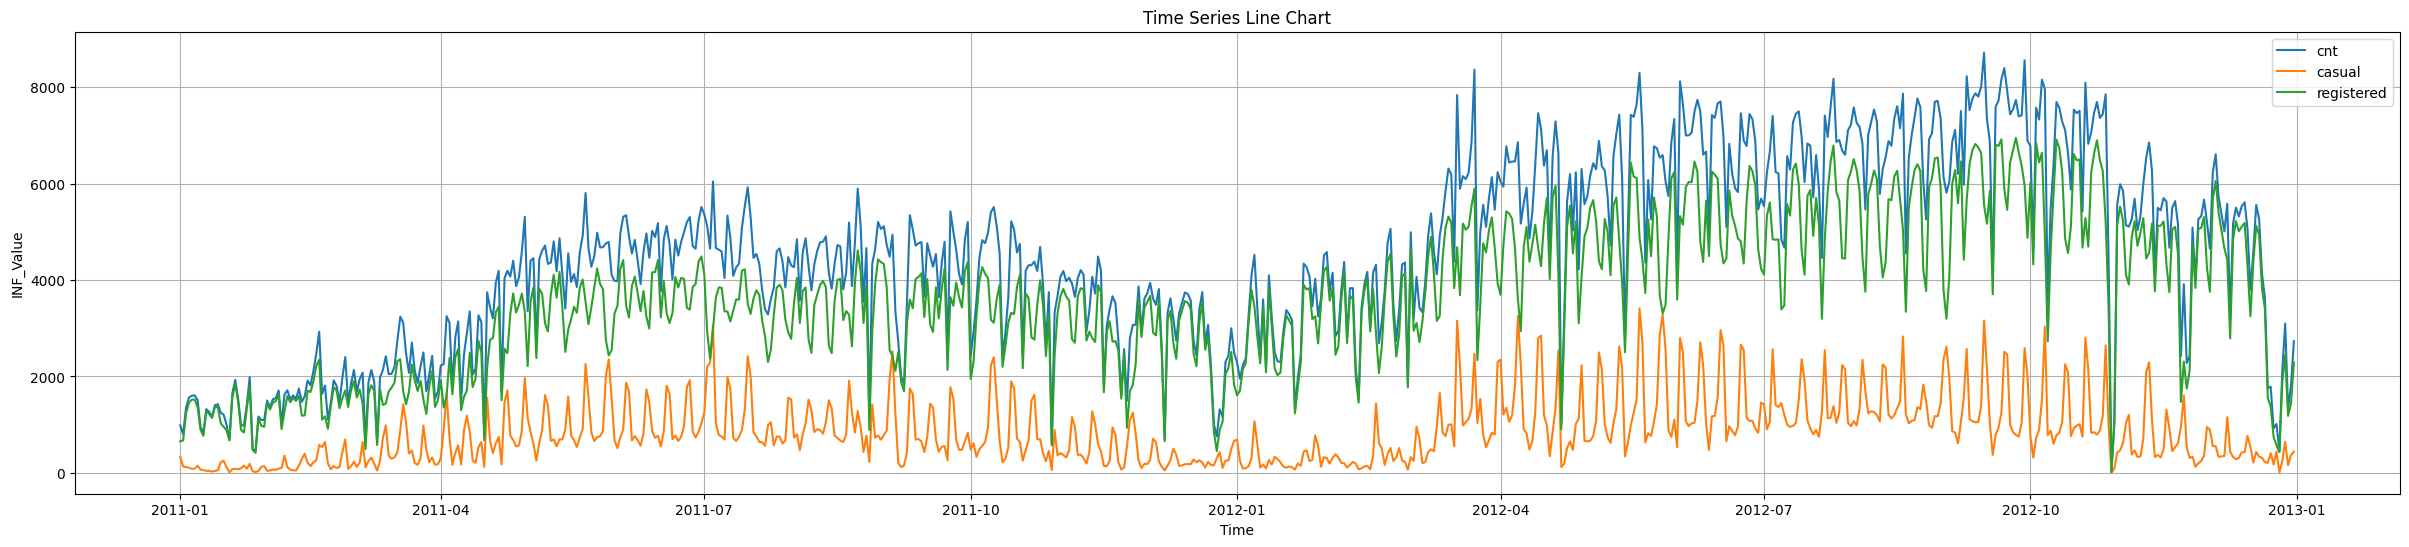

In [9]:
data_daily = data[target_var + ignore_vars].groupby(data.index.date).sum()

plt.figure(figsize=(30, 6))

for column in data_daily.columns:
    plt.plot(data_daily.index, data_daily[column], label=column)

plt.xlabel('Time')
plt.ylabel('INF_Value')
plt.title('Time Series Line Chart')
plt.legend()
plt.grid(True)
plt.show()

From The daily plot of the variables:
- The ratio of casual/registered users seems constant
- Aparently there are various types of seasonalities (daily, weekly, yearly)
- The are extreme values on the 29th of October and christmast days in both years. During these dates, the demand behave differently.

#### 1.4.2 Demand vs Categorical Variables

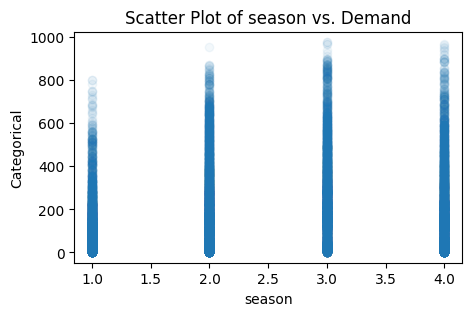

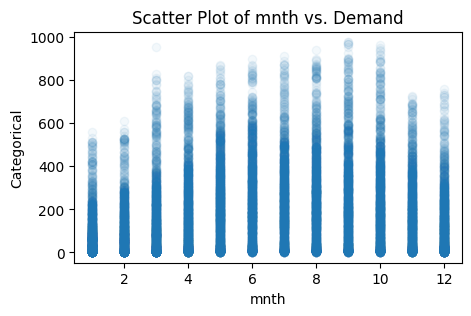

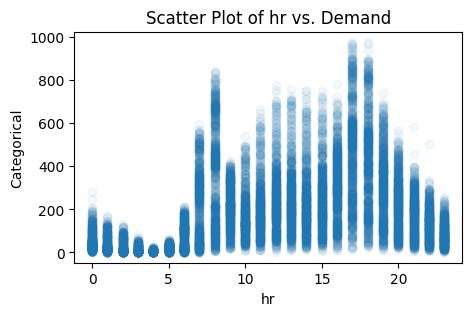

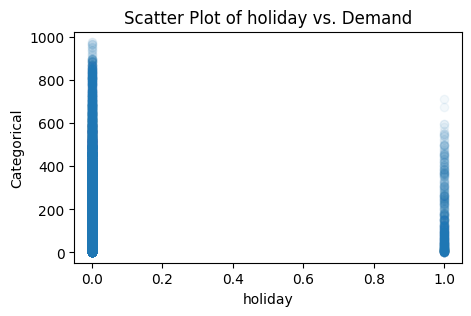

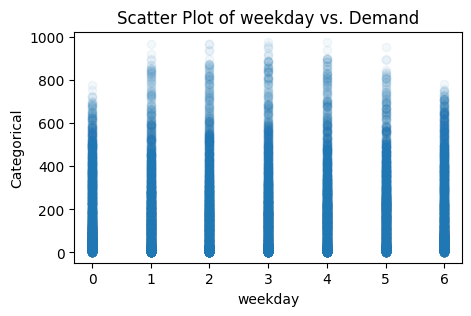

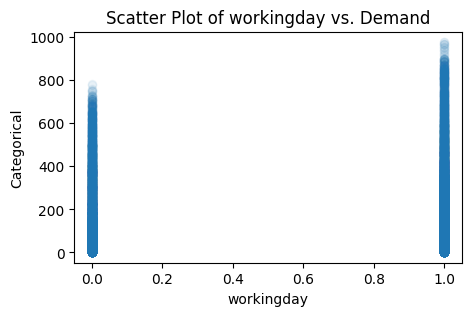

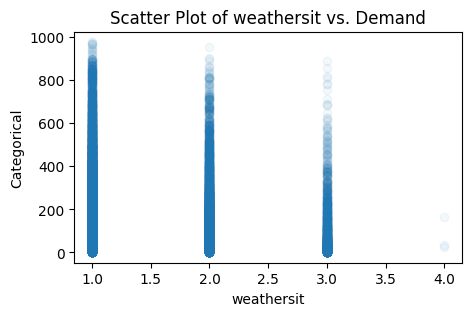

In [10]:
for cat in categorical_vars:
    plt.figure(figsize=(5, 3))
    plt.scatter(data[cat], data[target_var], alpha = .05)
    plt.xlabel(cat)
    plt.ylabel('Categorical')
    plt.title(f'Scatter Plot of {cat} vs. Demand')
    plt.show()

Some highlights from the plots:
- There are indeed several types of seasonality
    - Daily: Peak after-work hours
    - Weekly: Peak on wednesday
    - Yearly: Peak during Fall months
- The harsher the weather, the less demand for bikes
- There are very few records of extreme weather (Category 4)
    - This might be because during these conditions the demand is zero, and therefore is not present in the data
    - Oversampling is considered for these values.

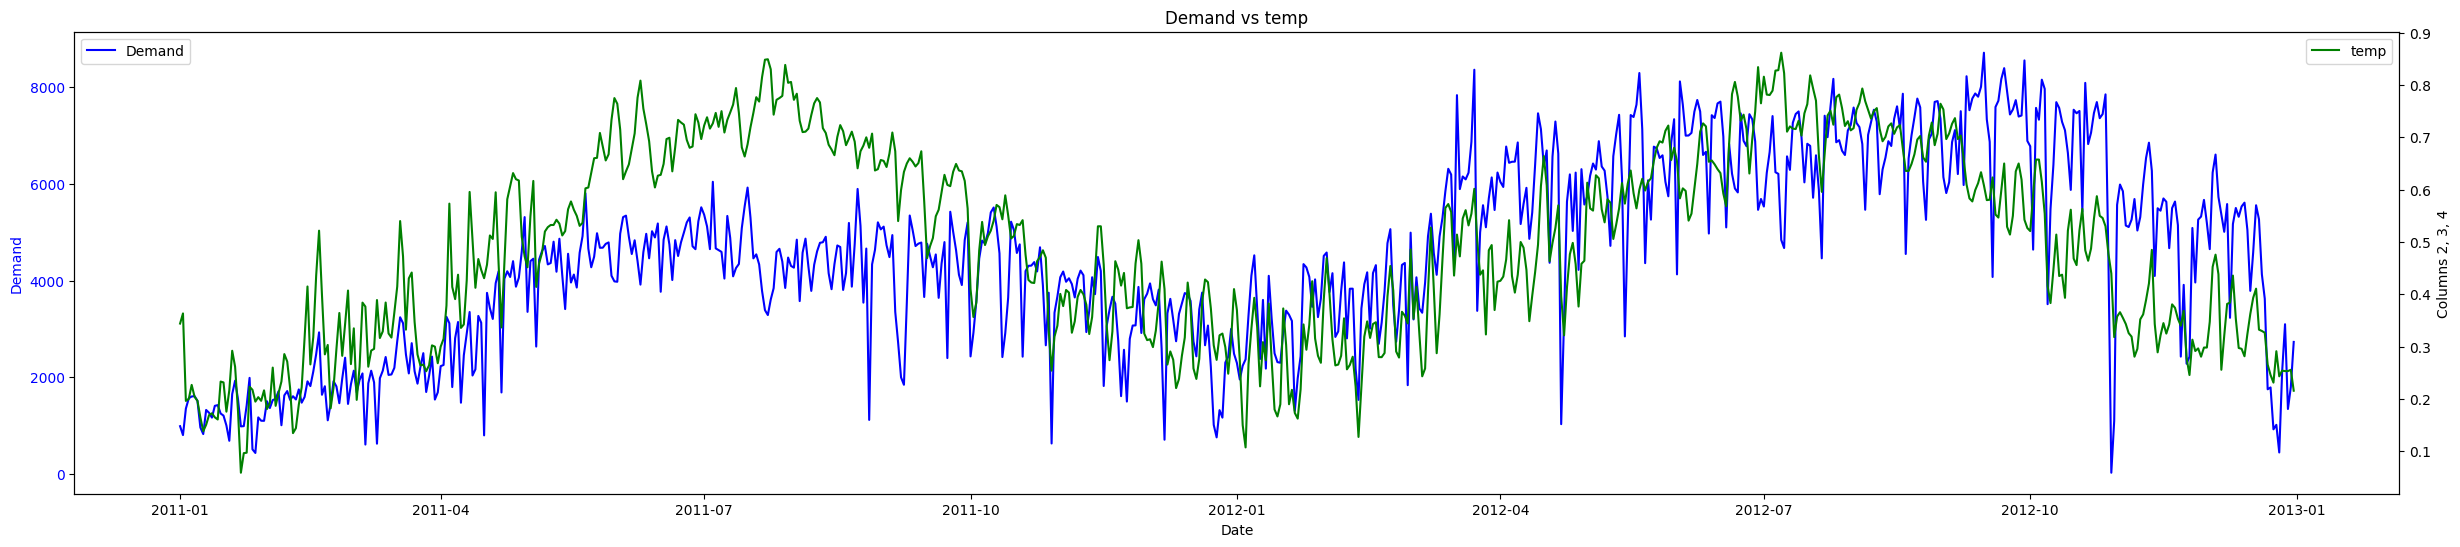

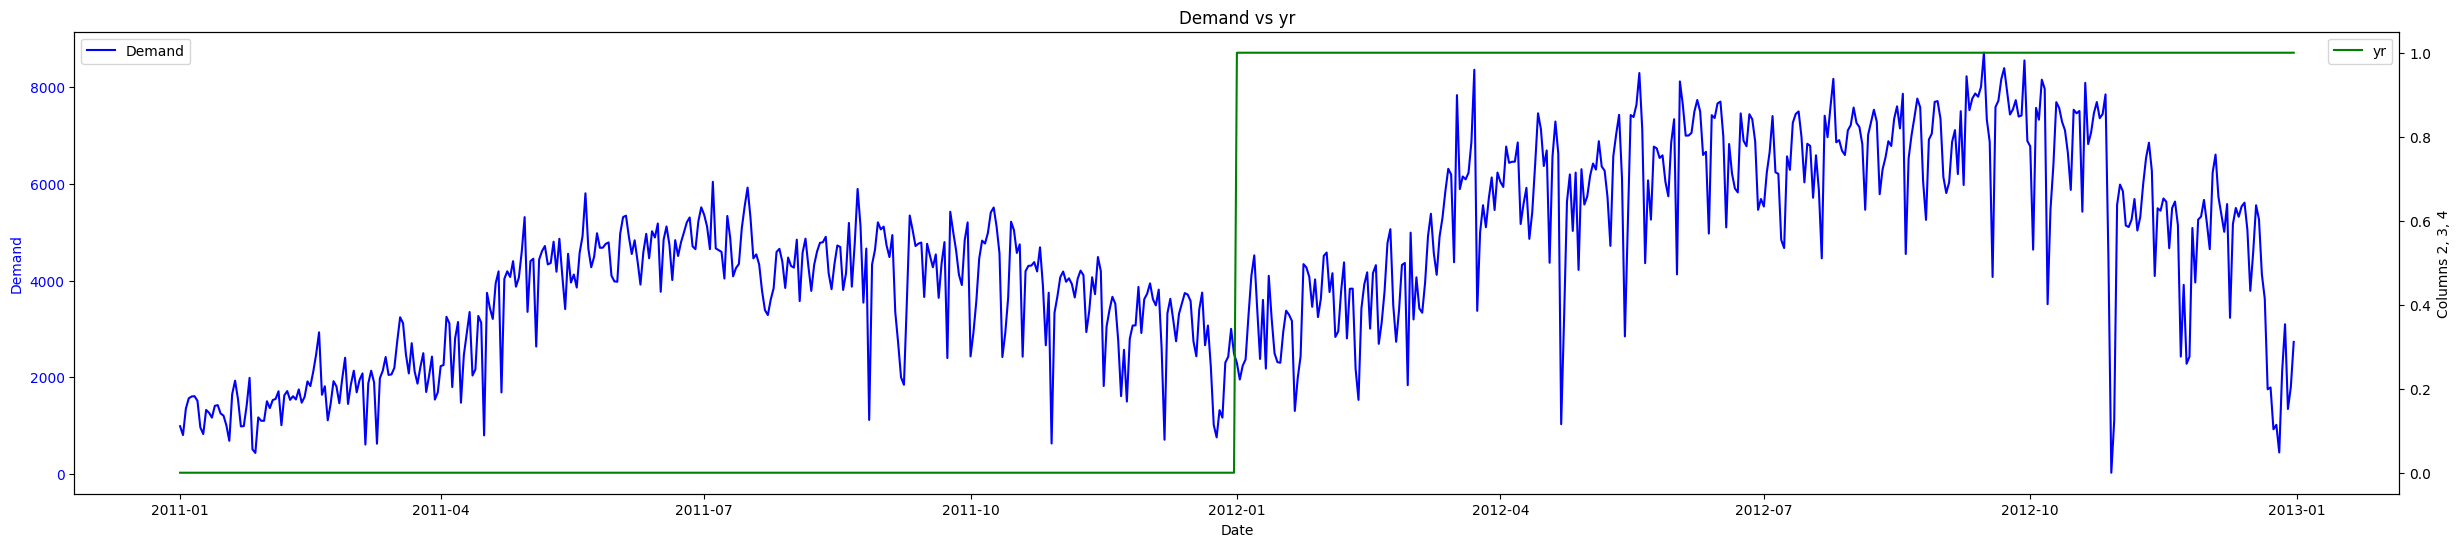

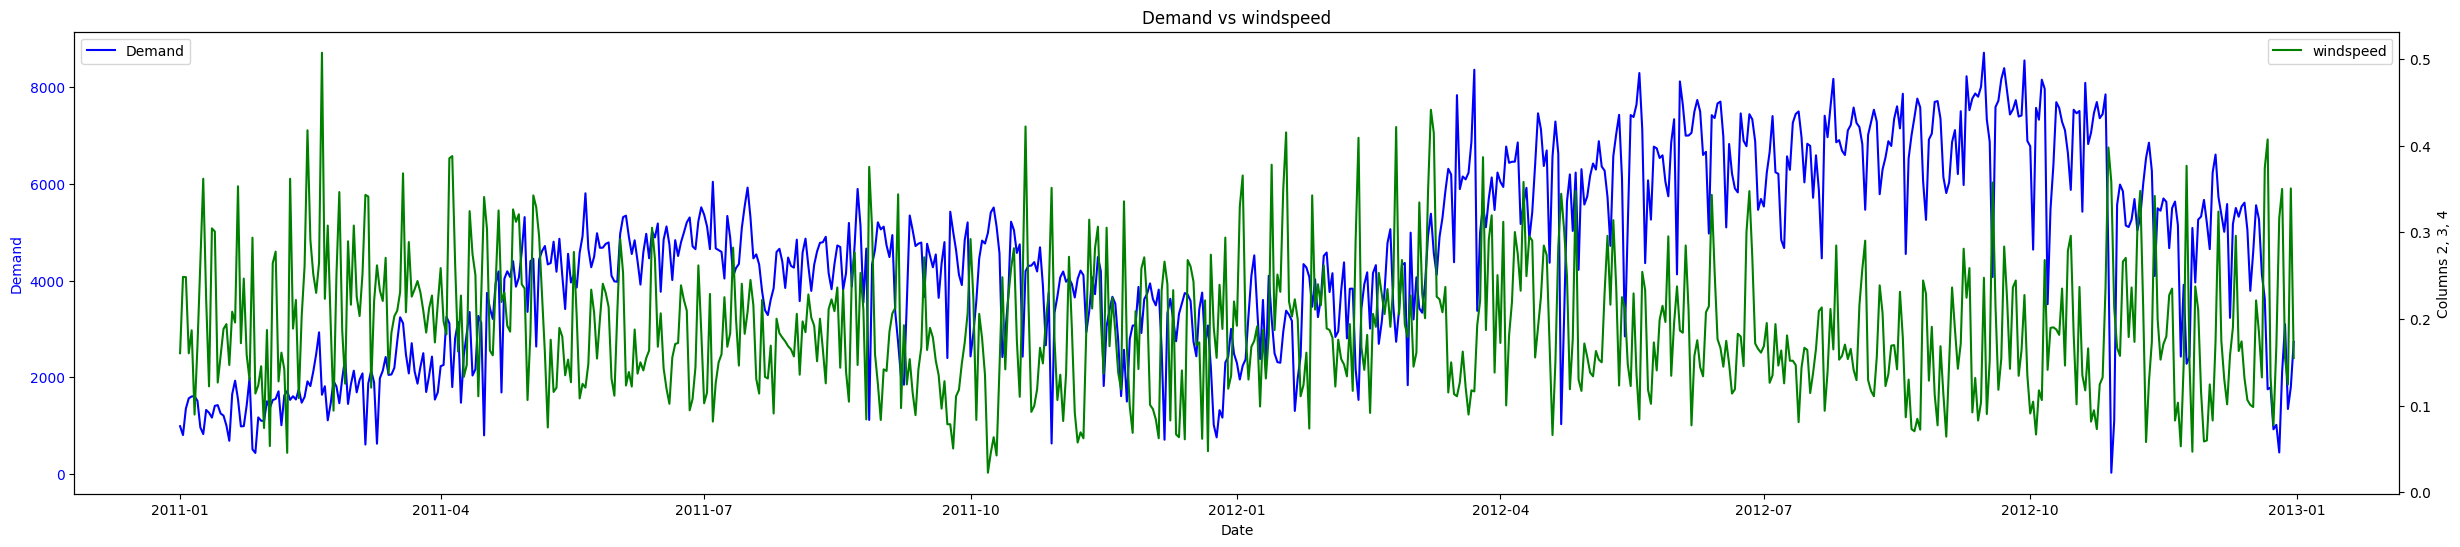

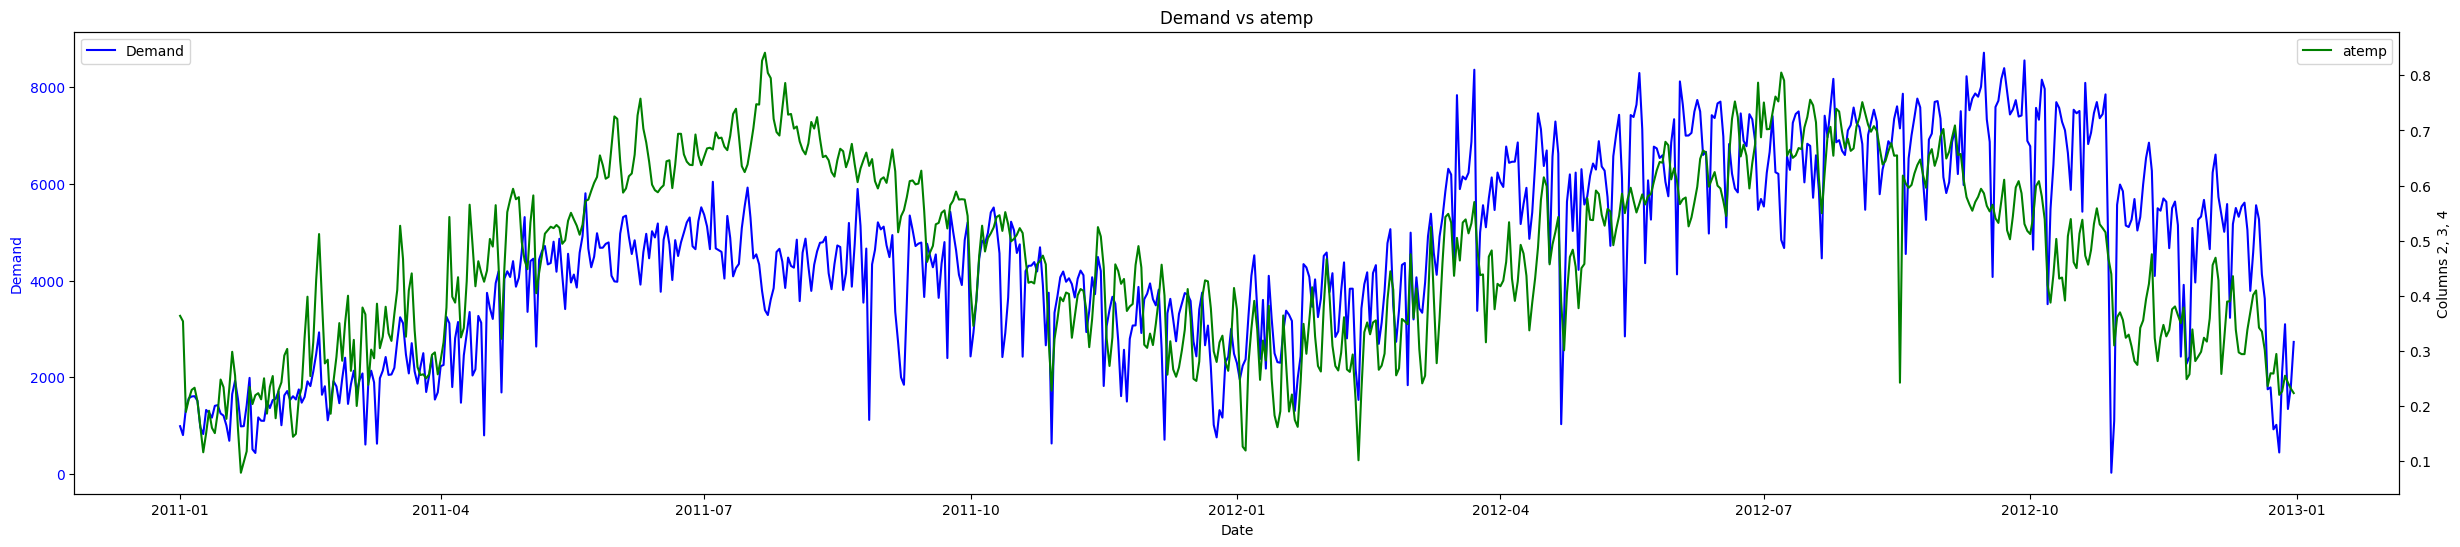

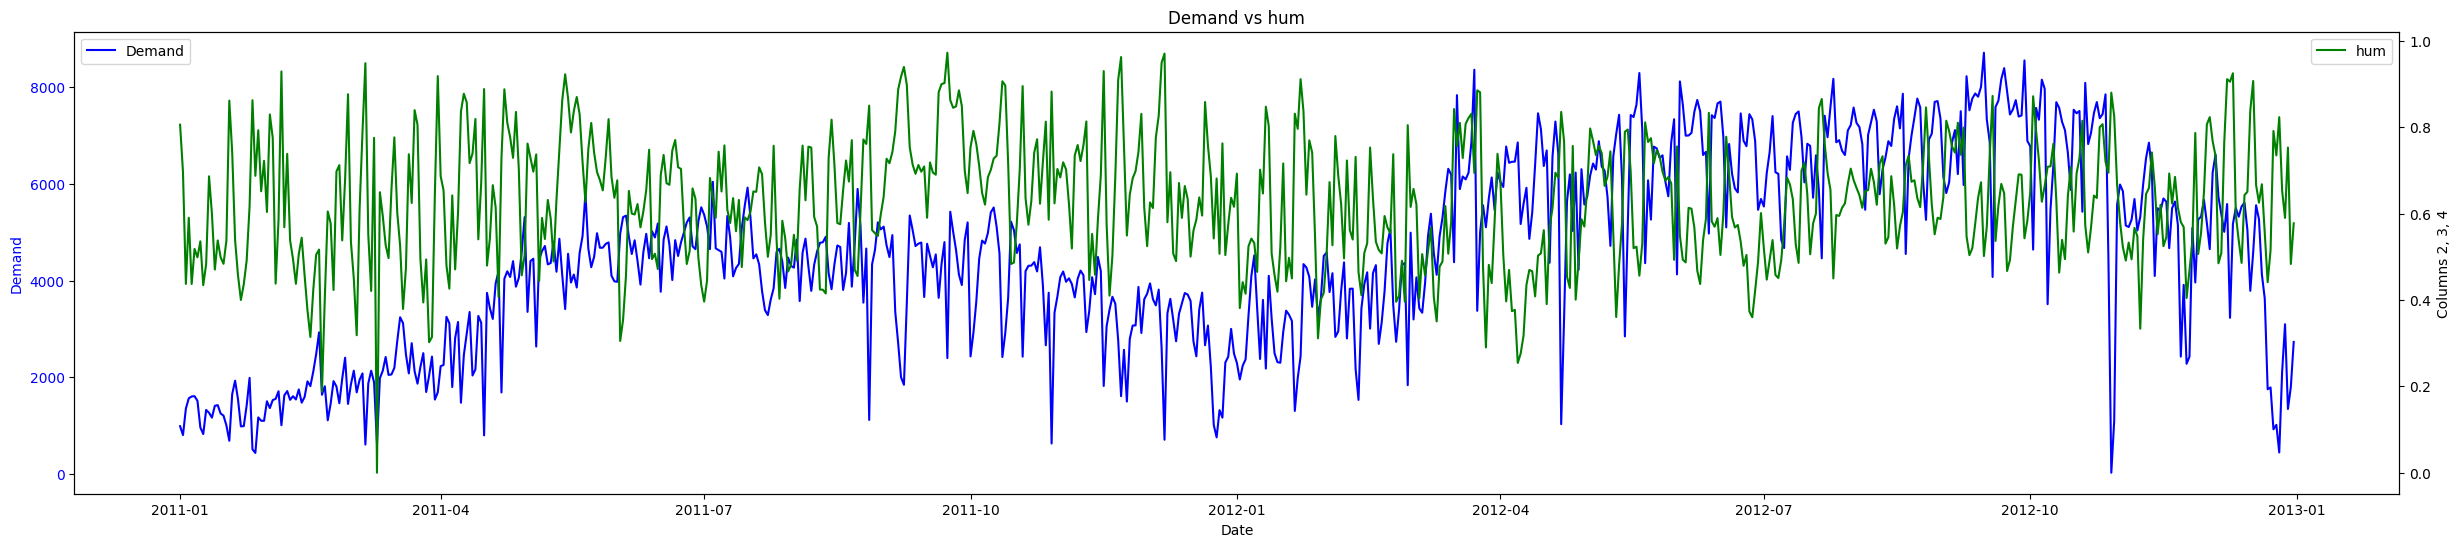

In [11]:
data_daily_weather = data[target_var + numerical_vars].groupby(data.index.date).agg({'cnt':'sum', 
                                                                                    'temp': 'mean',
                                                                                    'atemp': 'mean',
                                                                                    'hum': 'mean',
                                                                                    'windspeed': 'mean',
                                                                                    'yr': 'mean'})

# Create a figure and axis
for num in numerical_vars:
    fig, ax1 = plt.subplots(figsize=(30, 6))

    ax1.plot(data_daily_weather.index, data_daily_weather['cnt'], color='b', label='Demand')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Demand', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()

    ax2.plot(data_daily_weather.index, data_daily_weather[num], color='g', label=num)
    ax2.set_ylabel('Columns 2, 3, 4', color='k')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f'Demand vs {num}')
    plt.show()




### 1.5 New Variables
From the previous plots and the variable descriptions, we wanted to create to additional varaibles that might be interesting
- `temperature_perception`: The rolling average of the last 12 hours of the mean between `atemp` `temp`.
- `climate_perception`: The mode of the last 4 hours regarding the weather `weathersit`
Both try to add info on how has been the weather in the last hours before trying to rent a bike.

In [12]:

# Create climate_perception
data['climate_perception'] = data['weathersit'].rolling(window=3).apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
data['climate_perception'] = data['climate_perception'].fillna(data['climate_perception'].mode()[0])
categorical_vars.append('climate_perception')
# Create temperature_perception
data['temperature_perception'] = data['temp'].rolling(window=12).mean()
data['temperature_perception'] = data['temperature_perception'].fillna(data['climate_perception'].mean())
numerical_vars.append('temperature_perception')

In [13]:
data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,climate_perception,temperature_perception
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1.0,1.407733
2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1.0,1.407733
2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1.0,1.407733
2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1.0,1.407733
2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1.0,1.407733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2.0,0.236667
2012-12-31 20:00:00,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2.0,0.246667
2012-12-31 21:00:00,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2.0,0.253333


### 1.6 Correlation
We calculate the correlation between the Demand and the numerical varaibles
- We added the categorical just out of curiosity

In [14]:
corr_matx = data[numerical_vars+categorical_vars].corrwith(data['cnt']).to_frame()
corr_matx['abs_corr'] = corr_matx[0].abs()
corr_matx.reset_index(inplace=True)
corr_matx = corr_matx.sort_values('abs_corr', ascending=False)
#corr_matx['keep'] = corr_matx['abs_corr'] >= 0.15
corr_matx

,index,0,abs_corr
0,temp,0.404772,0.404772
3,atemp,0.400929,0.400929
8,hr,0.394071,0.394071
4,hum,-0.322911,0.322911
5,temperature_perception,0.258379,0.258379
1,yr,0.250495,0.250495
6,season,0.178056,0.178056
13,climate_perception,-0.147984,0.147984
12,weathersit,-0.142426,0.142426
7,mnth,0.120638,0.120638


<Axes: >

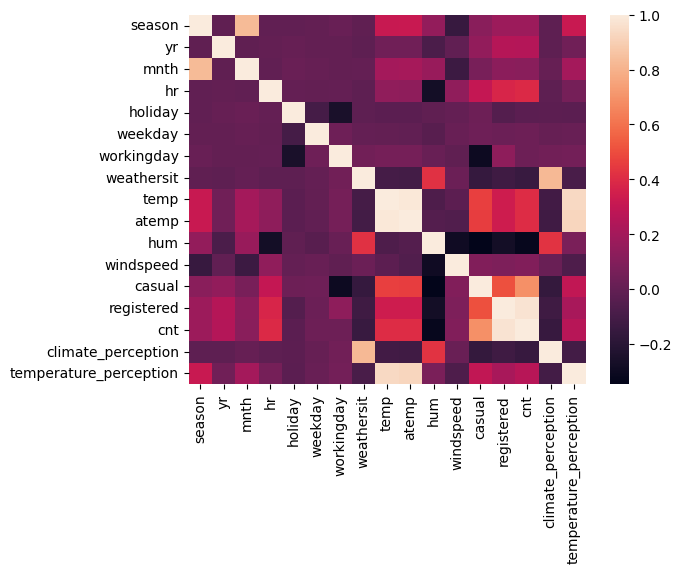

In [15]:
corr = data.select_dtypes('number').corr()
sns.heatmap(corr)

### 1.7 Categorical Features
We need to transfor the categorical columns using **One Hot Encoding** for future modeling

In [16]:
#We transform the columns into their final type
data[categorical_vars] = data[categorical_vars].astype(object)
data[numerical_vars] = data[numerical_vars].astype('float64')

#We reset the index to avoid problems
data.reset_index(inplace=True)
data_prep = data.copy()

#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False, drop = 'first')
ohe.fit(data_prep[categorical_vars])

dat_ohe = pd.DataFrame(ohe.transform(data_prep[categorical_vars]))
dat_ohe.columns = ohe.get_feature_names_out()
data_prep = data_prep.drop(categorical_vars, axis=1)
data_prep = pd.concat((data_prep, dat_ohe), axis=1)

#Set the date back as index in both datasets
data_prep.set_index('datetime', inplace=True)
data_prep = data_prep.drop(ignore_vars, axis=1)
data.set_index('datetime', inplace=True)
data_prep

,yr,temp,atemp,hum,windspeed,cnt,temperature_perception,season_2,season_3,season_4,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4,climate_perception_2.0,climate_perception_3.0
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0.0,0.24,0.2879,0.81,0.0000,16,1.407733,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.22,0.2727,0.80,0.0000,40,1.407733,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 02:00:00,0.0,0.22,0.2727,0.80,0.0000,32,1.407733,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 03:00:00,0.0,0.24,0.2879,0.75,0.0000,13,1.407733,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 04:00:00,0.0,0.24,0.2879,0.75,0.0000,1,1.407733,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1.0,0.26,0.2576,0.60,0.1642,119,0.236667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2012-12-31 20:00:00,1.0,0.26,0.2576,0.60,0.1642,89,0.246667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2012-12-31 21:00:00,1.0,0.26,0.2576,0.60,0.1642,90,0.253333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## PART II: Prediction Model

### 2.0 Metrics

In [17]:
from sklearn.metrics import mean_absolute_percentage_error as metric_1
from sklearn.metrics import mean_squared_error as metric_2

### 2.1 Time based Split
For this dataseries, we will do split based on the dates. 
- There are ~17k rows
- We will leave 10% of them for test. That is equivalent to data after Oct-20-2012
- We will leave 10% of them for validation. That is equivalent to data between Oct-20-2012 and Aug-09-2012

In [18]:
X_train = data_prep.loc[(data_prep.index < '2012-08-09')].drop(target_var, axis=1)
y_train = data_prep.loc[(data_prep.index < '2012-08-09')][target_var]

X_val = data_prep.loc[(data_prep.index < '2012-10-20') & (data_prep.index >= '2012-08-09')].drop(target_var, axis=1)
y_val = data_prep.loc[(data_prep.index < '2012-10-20') & (data_prep.index >= '2012-08-09')][target_var]

X_test = data_prep.loc[(data_prep.index >= '2012-10-20')].drop(target_var, axis=1)
y_test = data_prep.loc[(data_prep.index >= '2012-10-20')][target_var]

X_trainval = pd.concat([X_train, X_val])
y_trainval = pd.concat([y_train, y_val])

### 2.2 Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression as model_constructor_lr

# Model 1
model_lr = model_constructor_lr()
model_lr.fit(X_trainval, y_trainval)
#Predict
train_pred_lr = model_lr.predict(X_trainval)
test_pred_lr = model_lr.predict(X_test)

#Metrics
MAPE_lr_train = metric_1(y_trainval, train_pred_lr)
MSE_lr_train = metric_2(y_trainval, train_pred_lr)
MAPE_lr_test = metric_1(y_test, test_pred_lr)
MSE_lr_test = metric_2(y_test, test_pred_lr)

print(f'MAPE: {MAPE_lr_test:.2f}, MSE: {MSE_lr_test:.2f}')

MAPE: 2.21, MSE: 13524.69


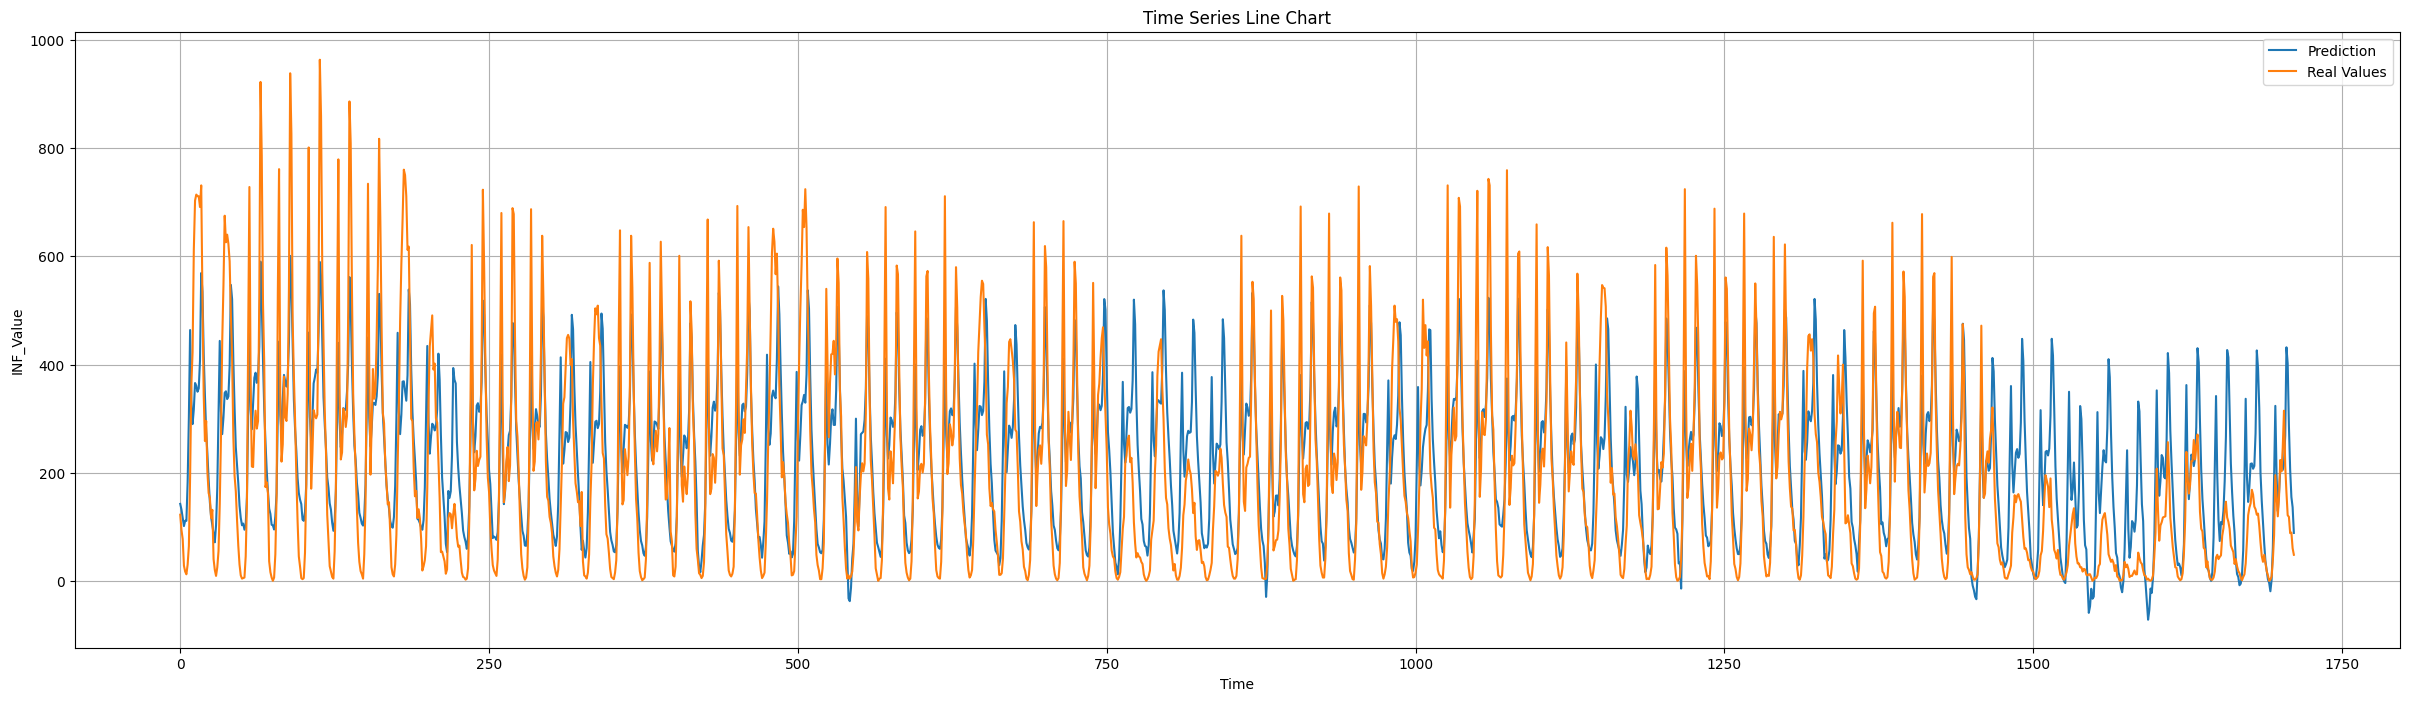

In [20]:
plt.figure(figsize=(30, 8))

plt.plot(test_pred_lr, label='Prediction')
plt.plot(y_test['cnt'].values, label='Real Values')
plt.xlabel('Time')
plt.ylabel('INF_Value')
plt.title('Time Series Line Chart')
plt.legend()
plt.grid(True)
plt.show()

### 2.3 Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor as model_constructor_dt
from sklearn.model_selection import GridSearchCV

# Model 2
max_depth = [5, 10, 20, 30]
min_samples_split = [5, 10, 20, 30]

params_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split}

grid_dt = GridSearchCV(model_constructor_dt(),
                     param_grid=params_grid,
                     cv = 3,
                     scoring = 'neg_mean_squared_error')
grid_dt.fit(X_trainval, y_trainval)

#Predict
train_pred_dt = grid_dt.predict(X_trainval)
test_pred_dt = grid_dt.predict(X_test)

#Metrics
MAPE_dt_train = metric_1(y_trainval, train_pred_dt)
MSE_dt_train = metric_2(y_trainval, train_pred_dt)
MAPE_dt_test = metric_1(y_test, test_pred_dt)
MSE_dt_test = metric_2(y_test, test_pred_dt)

print(f'MAPE: {MAPE_dt_test:.2f}, MSE: {MSE_dt_test:.2f}')

MAPE: 0.66, MSE: 10809.39


In [22]:
grid_dt.best_params_

{'max_depth': 30, 'min_samples_split': 10}

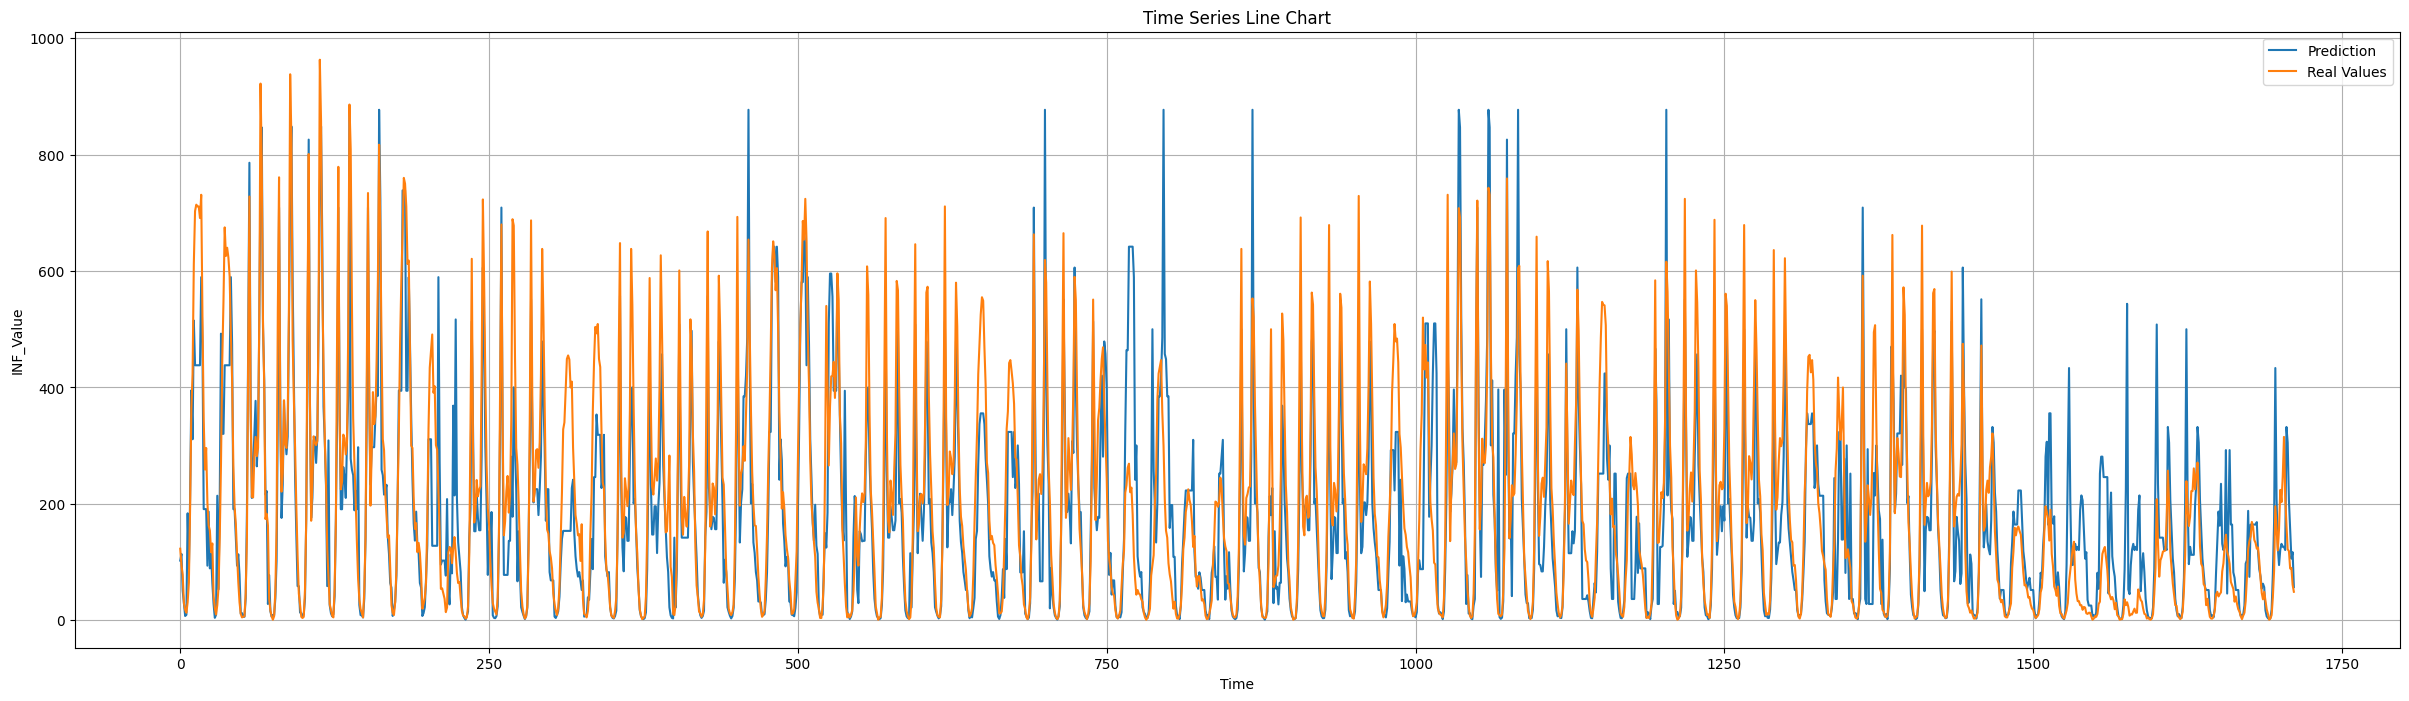

In [23]:
plt.figure(figsize=(30, 8))

plt.plot(test_pred_dt, label='Prediction')
plt.plot(y_test['cnt'].values, label='Real Values')
plt.xlabel('Time')
plt.ylabel('INF_Value')
plt.title('Time Series Line Chart')
plt.legend()
plt.grid(True)
plt.show()

### 2.4 XGBoost (Basic)
- We start with a basic XGBoost to make small experiments on the hyperparameters, so we can focus better the Gridsearch
- After some iterations, we will make a Gridsearch with `subsample`, `colsample_bytree`, `eta` or `learning_rate`, `max_depth` and `num_parallel_tree`

In [24]:
from xgboost import XGBRegressor as model_constructor_xgb
model_xg = model_constructor_xgb(subsample = 0.9,
                            colsample_bytree = 0.9,
                            early_stopping_rounds = 10,
                            #alpha = 10,
                            #gamma = 10,
                            eta = 1,
                            max_depth = 20,
                            eval_metric = "mape",
                            num_parallel_tree = 5,
                            random_state = 0) # Use same random_state as in training!!!

# [4] Train model
model_xg.fit(X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            verbose = False)

#Predict
train_pred = model_xg.predict(X_trainval)
test_pred = model_xg.predict(X_test)

#Metrics
MAPE_xgt_train = metric_1(y_trainval, train_pred)
MSE_xgt_train = metric_2(y_trainval, train_pred)
MAPE_xgt_test = metric_1(y_test, test_pred)
MSE_xgt_test = metric_2(y_test, test_pred)

print(f'MAPE: {MAPE_xgt_test:.2f}, MSE: {MSE_xgt_test:.2f}')

MAPE: 0.74, MSE: 9835.54


### 2.5 XGBoost
- We now make the proper Gridsearch for the XGBoost Model

In [25]:
from xgboost import XGBRegressor as model_constructor_xgb

n_estimators_values = [100]
gamma_values = [0]
max_depth_values = [10,20]
learning_rate_values = [0.5, 1]
min_child_weight_values = [1]
subsample_values = [0.9,1]
colsample_bytree_values = [0.9,1]
num_parallel_tree_values = [5,7]

params_grid_XGB = {'n_estimators': n_estimators_values,
                  'learning_rate': learning_rate_values,
                  'gamma': gamma_values,
                  'max_depth': max_depth_values,
                  'min_child_weight': min_child_weight_values,
                  'subsample': subsample_values,
                  'colsample_bytree': colsample_bytree_values,
                  'num_parallel_tree': num_parallel_tree_values}

num_iter = 1;
grid_results_XGB = pd.DataFrame(columns = ('n_estimators',
                                       'learning_rate',
                                       'gamma',
                                       'max_depth',
                                       'min_child_weight',
                                       'subsample',
                                       'colsample_bytree',
                                       'best_iteration',
                                       'num_parallel_tree',
                                       'metric_train',
                                       'metric_val'))

for n_estimators in params_grid_XGB['n_estimators']:
    for learning_rate in params_grid_XGB['learning_rate']:
        for gamma in params_grid_XGB['gamma']:
            for max_depth in params_grid_XGB['max_depth']:
                for min_child_weight in params_grid_XGB['min_child_weight']:
                    for subsample in params_grid_XGB['subsample']:
                        for colsample_bytree in params_grid_XGB['colsample_bytree']:
                            for num_parallel_tree in params_grid_XGB['num_parallel_tree']:


                                                # Print trace
                                                print('Iteration = ' + str(num_iter))

                                                # [3] Define model
                                                model = model_constructor_xgb(n_estimators = n_estimators,
                                                                            learning_rate = learning_rate,
                                                                            gamma = gamma,
                                                                            max_depth = max_depth,
                                                                            min_child_weight = min_child_weight ,
                                                                            subsample = subsample,
                                                                            colsample_bytree = colsample_bytree,
                                                                            num_parallel_tree = num_parallel_tree,
                                                                            early_stopping_rounds = 5,
                                                                            eval_metric = "mape",
                                                                            random_state = 0) # nthread!!!

                                                # [4] Train model
                                                model.fit(X_train,
                                                y_train,
                                                eval_set=[(X_val, y_val)],
                                                verbose=False)

                                                best_iteration = model.best_iteration

                                                # [5] Predict
                                                pred_train = model.predict(X_train) # predict!
                                                pred_val = model.predict(X_val) # predict!

                                                # [6] Compute metric
                                                metric_train = metric_1(y_train, pred_train)
                                                metric_val = metric_1(y_val, pred_val)

                                                # print error
                                                print('MAPE train = %.2f - MAPE validation = %.2f.'
                                                      % (metric_train, metric_val))

                                                # Save iteration results
                                                grid_results_XGB.loc[num_iter]=[n_estimators,
                                                                            learning_rate,
                                                                            gamma,
                                                                            max_depth,
                                                                            min_child_weight,
                                                                            subsample,
                                                                            colsample_bytree,
                                                                            best_iteration,
                                                                            num_parallel_tree,
                                                                            metric_train,
                                                                            metric_val]
                                                num_iter += 1

Iteration = 1
MAPE train = 0.06 - MAPE validation = 0.33.
Iteration = 2
MAPE train = 0.07 - MAPE validation = 0.32.
Iteration = 3
MAPE train = 0.06 - MAPE validation = 0.34.
Iteration = 4
MAPE train = 0.07 - MAPE validation = 0.35.
Iteration = 5
MAPE train = 0.16 - MAPE validation = 0.34.
Iteration = 6
MAPE train = 0.10 - MAPE validation = 0.36.
Iteration = 7
MAPE train = 0.33 - MAPE validation = 0.47.
Iteration = 8
MAPE train = 0.33 - MAPE validation = 0.47.
Iteration = 9
MAPE train = 0.02 - MAPE validation = 0.36.
Iteration = 10
MAPE train = 0.04 - MAPE validation = 0.38.
Iteration = 11
MAPE train = 0.18 - MAPE validation = 0.37.
Iteration = 12
MAPE train = 0.10 - MAPE validation = 0.36.
Iteration = 13
MAPE train = 0.01 - MAPE validation = 0.37.
Iteration = 14
MAPE train = 0.02 - MAPE validation = 0.37.
Iteration = 15
MAPE train = 0.33 - MAPE validation = 0.39.
Iteration = 16
MAPE train = 0.33 - MAPE validation = 0.39.
Iteration = 17
MAPE train = 0.21 - MAPE validation = 0.41.
Iterat

In [26]:
grid_results_XGB = grid_results_XGB.sort_values(by = ['metric_val', 'metric_train'], ascending = [True, True])
grid_results_XGB.head(10)

,n_estimators,learning_rate,gamma,max_depth,min_child_weight,subsample,colsample_bytree,best_iteration,num_parallel_tree,metric_train,metric_val
2,100.0,0.5,0.0,10.0,1.0,0.9,0.9,82.0,7.0,0.072262,0.321734
1,100.0,0.5,0.0,10.0,1.0,0.9,0.9,98.0,5.0,0.059280,0.326608
5,100.0,0.5,0.0,10.0,1.0,1.0,0.9,46.0,5.0,0.159689,0.335890
3,100.0,0.5,0.0,10.0,1.0,0.9,1.0,97.0,5.0,0.057638,0.339903
4,100.0,0.5,0.0,10.0,1.0,0.9,1.0,83.0,7.0,0.073213,0.352057
18,100.0,1.0,0.0,10.0,1.0,0.9,0.9,47.0,7.0,0.064690,0.356797
12,100.0,0.5,0.0,20.0,1.0,0.9,1.0,10.0,7.0,0.100127,0.359510
6,100.0,0.5,0.0,10.0,1.0,1.0,0.9,68.0,7.0,0.098534,0.361746
20,100.0,1.0,0.0,10.0,1.0,0.9,1.0,37.0,7.0,0.090912,0.362008
9,100.0,0.5,0.0,20.0,1.0,0.9,0.9,24.0,5.0,0.018474,0.363100


In [27]:
best_model_XGB = grid_results_XGB.iloc[0]
best_model_XGB
model_xg = model_constructor_xgb(
                            learning_rate = (best_model_XGB.learning_rate),
                            max_depth = int(best_model_XGB.max_depth),
                            subsample = (best_model_XGB.subsample),
                            colsample_bytree = (best_model_XGB.colsample_bytree),
                            #num_parallel_tree = 2,
                            early_stopping_rounds = 7,
                            eval_metric = "mape",
                            random_state = 0) # Use same random_state as in training!!!

# [4] Train model
model_xg.fit(X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            verbose = False)

#Predict
train_pred_xg = model_xg.predict(X_trainval)
test_pred_xg = model_xg.predict(X_test)

#Metrics
MAPE_xg_train = metric_1(y_trainval, train_pred_xg)
MSE_xg_train = metric_2(y_trainval, train_pred_xg)
MAPE_xg_test = metric_1(y_test, test_pred_xg)
MSE_xg_test = metric_2(y_test, test_pred_xg)

print(f'MAPE: {MAPE_xg_test:.2f}, MSE: {MSE_xg_test:.2f}')

MAPE: 0.72, MSE: 8639.42


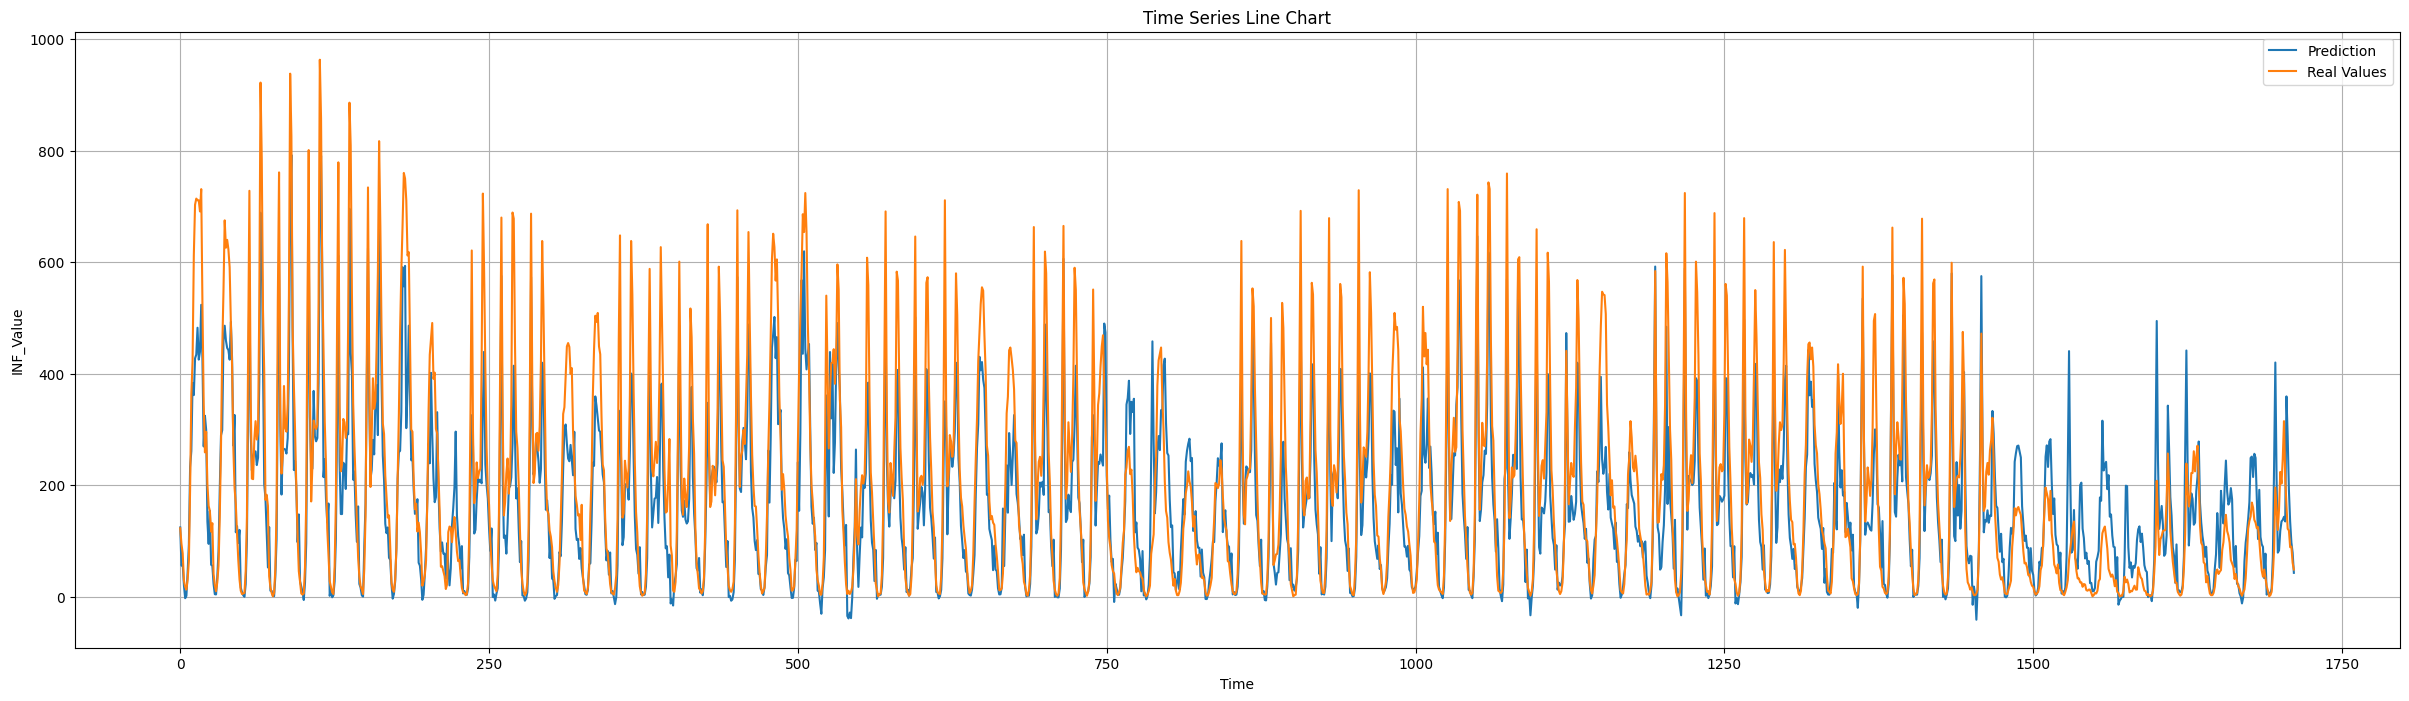

In [28]:
plt.figure(figsize=(30, 8))

plt.plot(test_pred_xg, label='Prediction')
plt.plot(y_test['cnt'].values, label='Real Values')
plt.xlabel('Time')
plt.ylabel('INF_Value')
plt.title('Time Series Line Chart')
plt.legend()
plt.grid(True)
plt.show()

### 2.6 Results
- Based on all tested models (Linear Reg, Decision Tree, XGBoost)
- All using the same TEST data (10% of total rows)

In [29]:
final_results = pd.DataFrame.from_dict({'model': ['linear_reg','decision_tree','xgboost'],
                                        'MAPE':[MAPE_lr_test, MAPE_dt_test, MAPE_xg_test],
                                        'MSE':[MSE_lr_test, MSE_dt_test, MSE_xg_test]})
final_results

,model,MAPE,MSE
0,linear_reg,2.208265,13524.692883
1,decision_tree,0.663732,10809.394274
2,xgboost,0.718146,8639.415039


In [30]:
print(f'Linear Regression - MAPE: {MAPE_lr_test:.2f}, MSE: {MSE_lr_test:.2f}')
print(f'Decision Tree - MAPE: {MAPE_dt_test:.2f}, MSE: {MSE_dt_test:.2f}')
print(f'XGBoost - MAPE: {MAPE_xg_test:.2f}, MSE: {MSE_xg_test:.2f}')

Linear Regression - MAPE: 2.21, MSE: 13524.69
Decision Tree - MAPE: 0.66, MSE: 10809.39
XGBoost - MAPE: 0.72, MSE: 8639.42


General Comments:
- XGBoost provide overall better results in MSE and MAPE metrics.
- All models provides in some cases negative values. This can should be corrected to ZERO. Maybe better understand of these hours can be added with the missing 0 demand hours.
- As previously mention, Christmast days behave different and thats where the models fail the most. These days should be maybe treated differently.

In [31]:
hour_dist = data.groupby(['weekday', 'hr'])[['registered','casual']].sum()
hour_dist['perc_casual'] = (hour_dist['casual'])/(hour_dist['casual']+hour_dist['registered'])
hour_dist['perc_registered'] = (hour_dist['registered'])/(hour_dist['casual']+hour_dist['registered'])
hour_dist

registered  casual  perc_casual  perc_registered
weekday hr                                                  
0       0         7879    1896     0.193964         0.806036
        1         6493    1560     0.193717         0.806283
        2         5002    1284     0.204263         0.795737
        3         2369     870     0.268601         0.731399
        4          697     258     0.270157         0.729843
...                ...     ...          ...              ...
6       19       17526    7427     0.297640         0.702360
        20       13549    5261     0.279692         0.720308
        21       12072    4152     0.255917         0.744083
        22       10890    3635     0.250258         0.749742
        23        9368    2681     0.222508         0.777492

[168 rows x 4 columns]

## PART III: Streamlit dashboard

### Models for Streamlit

In [32]:
joblib.dump(model_lr, 'linear_reg_model.joblib')
joblib.dump(grid_dt, 'decision_tree_model.joblib')
joblib.dump(model_xg, 'xgboost_model.joblib')

['xgboost_model.joblib']